# Classification of Iris Varieties

Iris might be more polular in the data science community as a machine learning classification problem than as a decorative flower. Three Iris varieties were used in the Iris flower data set outlined by Ronald Fisher in his famous 1936 paper “The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis”

Iris dataset to make predictions on the three types of iris. The prediction is based on shape of an iris leaf represented by its sepal length, sepal width, petal length.

# Understanding and loading the data

This data is saved as Dictionary-like object, the interesting attributes are: data, the data to learn, target, the classification labels, target_names, the names of the labels, feature_names, the names of the features, and DESCR, the full description of the dataset.

The data set consists of:

150 samples
3 labels: species of Iris (Iris setosa, Iris virginica and Iris versicolor)
4 features: length and the width of the sepals and petals, in centimetres.
Scikit learn only works if data is stored as numeric data, irrespective of it being a regression or a classeification problem. It also requires the arrays to be stored at numpy arrays for optimization. Since, this dataset is loaded from scikit learn, everything is appropriately formatted.

In [5]:
#install relevant modules
import numpy as np

#scikit-learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics

In [6]:
#import load_iris function from datasets module
from sklearn.datasets import load_iris

In [7]:
#import Matplotlib (scientific plotting library)

import matplotlib.pyplot as plt

In [8]:
#allow plots to appear within notebook
%matplotlib inline

In [9]:
# save "bunch" object containing iris dataset and its attributes into iris_df
iris_df = load_iris()
type(iris_df)

sklearn.utils.Bunch

In [10]:
#Look into features
print(iris_df.feature_names)
print(iris_df.data[0:3, :])
print(type(iris_df.data))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
<class 'numpy.ndarray'>


In [11]:
print(iris_df.target_names)
print(iris_df.target[:3])
print(type(iris_df.target))

['setosa' 'versicolor' 'virginica']
[0 0 0]
<class 'numpy.ndarray'>


In [12]:
# store feature matrix in X and label vector in y
X = iris_df.data
y = iris_df.target

#print and checks the shape of x and y
print("shape of X: ", X.shape, "& shape of Y: ", y.shape)

shape of X:  (150, 4) & shape of Y:  (150,)


# Training a machine learning model with scikit-learn

# K-nearest neighbors (KNN) classification

This method searches for the K observations in the training data that are “nearest” to the measurements of the new observation. Then it uses the most popular response value from the K nearest neighbors as the predicted response value for the new observation. Following steps:

Provide a value of K
“Instantiate” (make an instance of) the “estimator” (scikit-learn’s term for model)
Train the model with data (Model learns the relationship between X and y, Occurs in-place)
Predict the response for a new observation

In [13]:
# KNN classification
# Instantiate the estimator
knn1 = KNeighborsClassifier(n_neighbors=1)
knn5 = KNeighborsClassifier(n_neighbors=5)

# Train the model
# output displays the default values

knn1.fit(X,y)
knn5.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [14]:
#predict the response
X_new = [[3, 4, 5, 2], [5, 2, 3, 2]]
print("n_neighbors=1 predicts: ", knn1.predict(X_new))
print("n_neighbors=2 predicts: ",knn5.predict(X_new))

n_neighbors=1 predicts:  [2 1]
n_neighbors=2 predicts:  [1 1]


# Logistic Regression Classification

Logistic regression is another very common way of classification. Logistic regression was developed by statistician David Cox in 1958. The binary logistic model is used to estimate the probability of a binary response based on one or more features. And for classifying more than two labels, it uses “one versus the rest” technique.

In [15]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
# output displays the default values
logreg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
#predict the response for new observation
logreg.predict(X_new)

array([2, 2])

# Evaluating the models

One Common evaluation metric for classification accuracy in classification problems is proportion of correct predictions, accuracy_score, on a given set. We can get accuracy_score for the training data or a new set of observations.

# 1. Train and test on the entire dataset

Training and testing on the same data is not recommended as our goal is to estimate likely performance of a model on out-of-sample data. But, maximizing training accuracy rewards overly complex models that won’t necessarily generalize and result in overfitting the training data.

In [17]:
#store the predicted response values
y_pred_knn1 = knn1.predict(X)
y_pred_knn5 = knn5.predict(X)
y_pred_logreg = logreg.predict(X)

#compute classification accuracy for the logistic regression model

print("Accuracy of KNN with n_neighbors=1: ", metrics.accuracy_score(y, y_pred_knn1))
print("Accuracy of KNN with n_neighbors=5: ", metrics.accuracy_score(y, y_pred_knn5))
print("Accuracy of logistic regression: ", metrics.accuracy_score(y, y_pred_logreg))

Accuracy of KNN with n_neighbors=1:  1.0
Accuracy of KNN with n_neighbors=5:  0.9666666666666667
Accuracy of logistic regression:  0.96


# 2. Train / test Split Method

It is one of the most common way to test the accuracy of a model. Its fairly intuitive to understand, split the dataset into a training set and a testing set in any proportion. Train the model on the training set. Test the model on the testing set.

Note tha I use random_state=some_number, to guarantee that my split is always identica;s. This is useful to get reproducible results, and compare across models.

In [22]:
# Splitting the data in 75% training data and 25% testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)
print("shape of X_train: ", X_train.shape, "& shape of y_train: ", y_train.shape)
print("shape of X_test: ", X_test.shape, "& shape of y_test: ", y_test.shape)

shape of X_train:  (90, 4) & shape of y_train:  (90,)
shape of X_test:  (60, 4) & shape of y_test:  (60,)


In [24]:
#Instantiate the estimators
knn1 = KNeighborsClassifier(n_neighbors=1)
knn5 = KNeighborsClassifier(n_neighbors=5)
logreg = LogisticRegression()

#Train the models
#output displays the default values
logreg.fit(X_train, y_train)
knn1.fit(X_train, y_train)
knn5.fit(X_test, y_test)
print('\n')


In [25]:
#Predictions
y_pred_knn1 = knn1.predict(X_test)
y_pred_knn5 = knn5.predict(X_test)
y_pred_logreg = logreg.predict(X_test)

#compute classification accuracy for the logistic regression model
print("Accuracy of KNN with n_neighbors=1: ",metrics.accuracy_score(y_test, y_pred_knn1))
print("Accuracy of KNN with n_neighbors=5: ",metrics.accuracy_score(y_test, y_pred_knn5))
print("Accuracy of logistic regression: ",metrics.accuracy_score(y_test, y_pred_logreg))


Accuracy of KNN with n_neighbors=1:  0.95
Accuracy of KNN with n_neighbors=5:  0.9833333333333333
Accuracy of logistic regression:  0.95


# 3. Best estimate of K for KNN-classification

Instead of guessing what K value to use for our KNN-classification, we can find the optimum value by testing our data for a range of k-values. We can then plot accuracy on test-data as a function of k to pick the one that gives highest accuracy.

In [27]:
# try K=1 through K=25 and record testing accuracy

k_range = list(range(1,26,2))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0,0.5,'Accuracy')

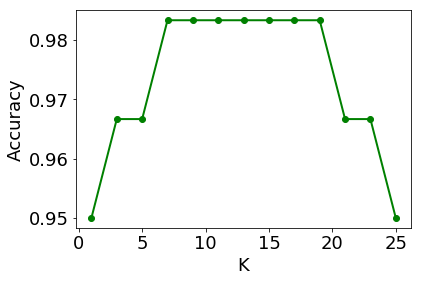

In [38]:
#plot the relationship between K and testing accuracy
plt.rcParams.update({'font.size': 18})
plt.plot(k_range, scores, 'go', linewidth=2.0, linestyle="-")
plt.xlabel('K')
plt.ylabel('Accuracy')

So, we pick the value for k which works best on this test set for any new observations.